In [5]:
import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import null_space
import time
from scipy.stats.distributions import chi2

In [3]:

def download_data(gnss_location: str, save_path: str = "./DATA") -> None:
    url = f"http://geodesy.unr.edu/gps_timeseries/tenv3/IGS14/{gnss_location}.tenv3"

    if not os.path.exists(save_path):
        os.makedirs(save_path)

    response = requests.get(url)
    
    if response.status_code == 200:
        file_path = f"{save_path}/{gnss_location}.tenv3"
        with open(file_path, "wb") as file:
            file.write(response.content)
        print(f"File downloaded successfully: {file_path}")
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")


In [4]:
#panda dataframe
df = pd.read_csv('midas.IGS14_1.txt', delim_whitespace= True, header=None)
#numpy array just because its easier for me
data = np.array(df)




/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_85279/2697764730.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('midas.IGS14_1.txt', delim_whitespace= True, header=None)


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,00NA,MIDAS5,2008.2355,2018.7324,10.4969,3190,2968,5171,0.036213,0.058799,...,0.072,0.116,0.072,0.002145,0.002358,0.008469,1,-12.466639,-229.156012,104.84337
1,01NA,MIDAS5,2008.2683,2019.7426,11.4743,2362,2362,3599,0.035826,0.059595,...,0.083,0.089,0.113,0.001910,0.001951,0.006980,1,-12.478223,-229.017953,105.37638
2,02NA,MIDAS5,2008.7255,2016.9993,8.2738,1913,1913,3392,0.036171,0.059940,...,0.064,0.090,0.071,0.001904,0.002059,0.007934,0,-12.355923,-229.118271,117.65070
3,0ABI,MIDAS5,2009.4428,2024.1862,14.7434,5365,5365,10003,0.015101,0.014912,...,0.081,0.073,0.059,0.002124,0.002127,0.008196,0,68.354344,-341.183556,431.36114
4,0ABY,MIDAS5,2015.2717,2024.1862,8.9145,3242,3242,5756,0.018469,0.013932,...,0.046,0.048,0.056,0.002114,0.001860,0.007450,0,58.658908,-343.820357,60.52724


In [6]:
# Specifying region (bounding box)
lat_min = 37  # Minimum latitude
lat_max = 38   # Maximum latitude
lon_min = -122  # Minimum longitude
lon_max = -121  # Maximum longitude

# Filtering data based on latitude and longitude conditions
filtered_data = data[(data[:, 24] >= lat_min) & (data[:, 24] <= lat_max) &
                             (data[:, 25] >= lon_min) & (data[:, 25] <= lon_max)]

# Extracting names from the first column for the filtered data
station_names_in_region = filtered_data[:, 0]
print(station_names_in_region.size)

#stay in pandas

# Filtering data based on latitude and longitude conditions
filtered_data_pd = df[(df[24] >= lat_min) & (df[24] <= lat_max) & (df[25] >= lon_min) & (df[25] <= lon_max)]


55


In [7]:
station_names_in_region

array(['BWOD', 'CAFT', 'CAP4', 'CAPL', 'CNDR', 'CROW', 'CSJB', 'CYTE',
       'DIAB', 'DUBP', 'LEIC', 'LIVM', 'LUTZ', 'MHC2', 'MHCB', 'MILP',
       'MONB', 'MSHP', 'MTPK', 'MTWK', 'ORE2', 'ORE3', 'OREO', 'P213',
       'P214', 'P215', 'P216', 'P217', 'P226', 'P227', 'P228', 'P229',
       'P230', 'P240', 'P241', 'P244', 'P248', 'P252', 'P253', 'P254',
       'P255', 'P256', 'P257', 'P258', 'P260', 'P781', 'RJAB', 'S300',
       'SACL', 'SEI2', 'SEIB', 'SOD2', 'SODB', 'STCK', 'THAL'],
      dtype=object)

In [9]:
#uncomment for downloading data
# for site in station_names_in_region:
#     download_data(site)

File downloaded successfully: ./DATA/BWOD.tenv3
File downloaded successfully: ./DATA/CAFT.tenv3
File downloaded successfully: ./DATA/CAP4.tenv3
File downloaded successfully: ./DATA/CAPL.tenv3
File downloaded successfully: ./DATA/CNDR.tenv3
File downloaded successfully: ./DATA/CROW.tenv3
File downloaded successfully: ./DATA/CSJB.tenv3
File downloaded successfully: ./DATA/CYTE.tenv3
File downloaded successfully: ./DATA/DIAB.tenv3
File downloaded successfully: ./DATA/DUBP.tenv3
File downloaded successfully: ./DATA/LEIC.tenv3
File downloaded successfully: ./DATA/LIVM.tenv3
File downloaded successfully: ./DATA/LUTZ.tenv3
File downloaded successfully: ./DATA/MHC2.tenv3
File downloaded successfully: ./DATA/MHCB.tenv3
File downloaded successfully: ./DATA/MILP.tenv3
File downloaded successfully: ./DATA/MONB.tenv3
File downloaded successfully: ./DATA/MSHP.tenv3
File downloaded successfully: ./DATA/MTPK.tenv3
File downloaded successfully: ./DATA/MTWK.tenv3
File downloaded successfully: ./DATA/ORE

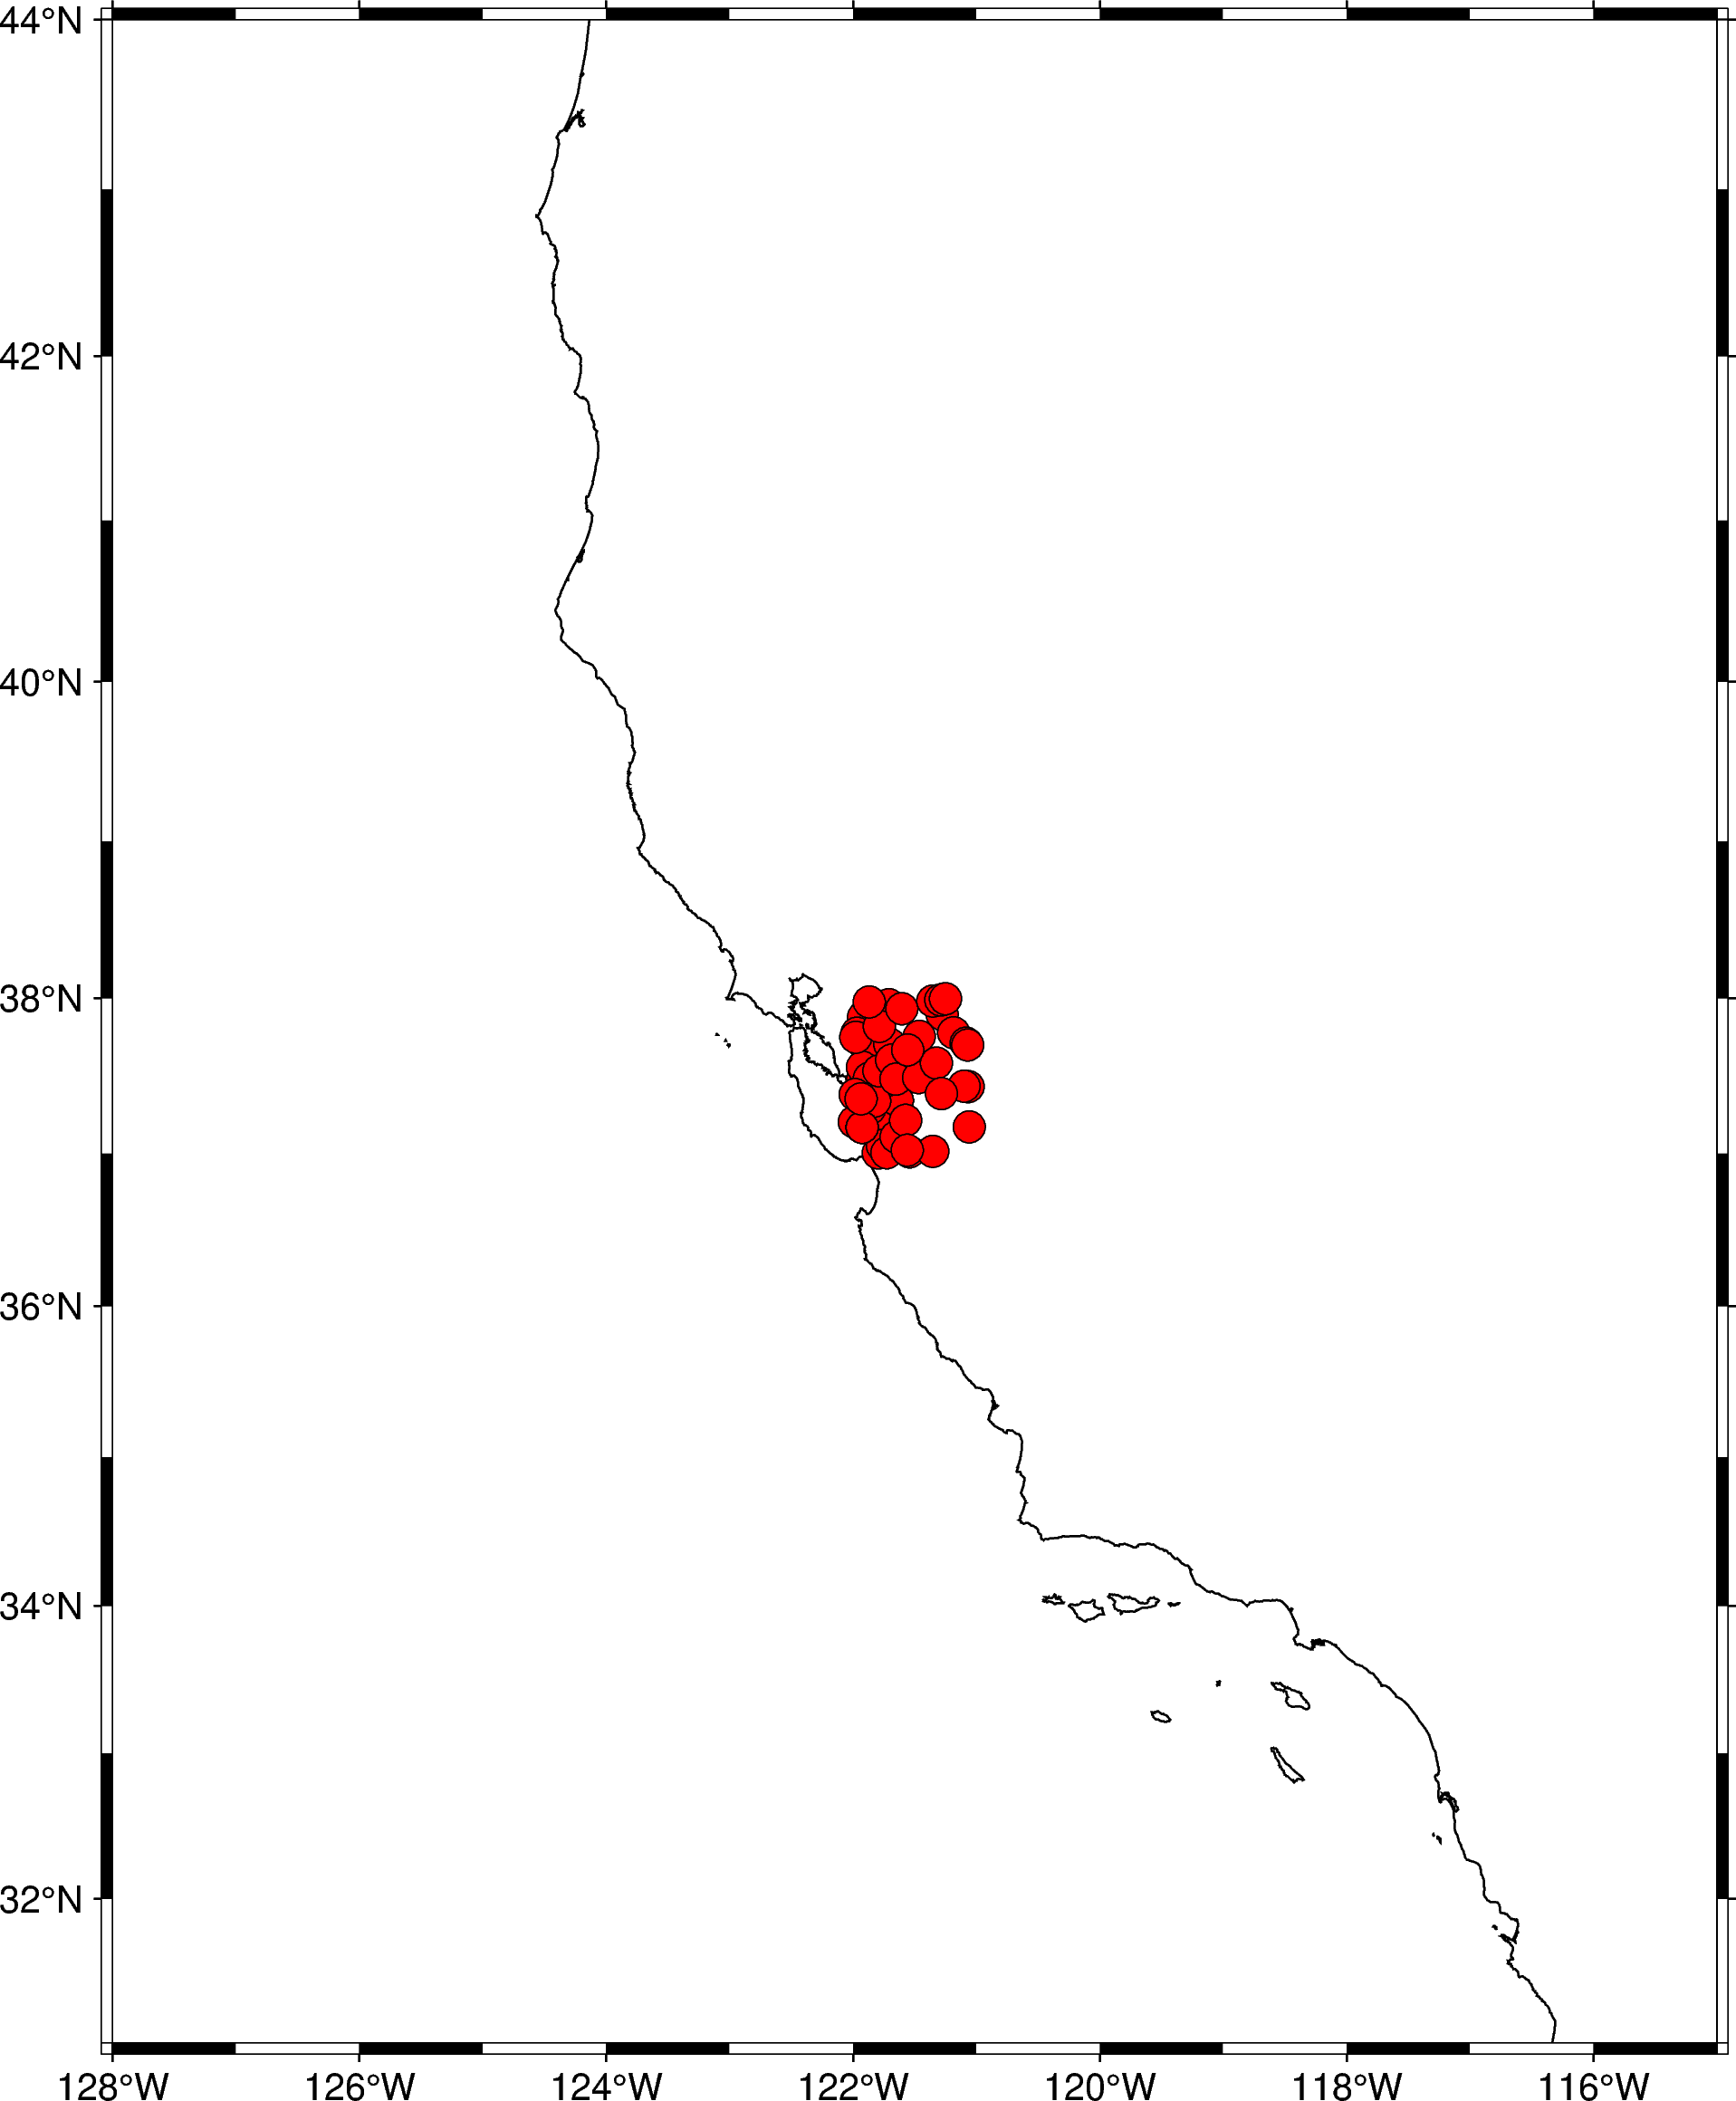

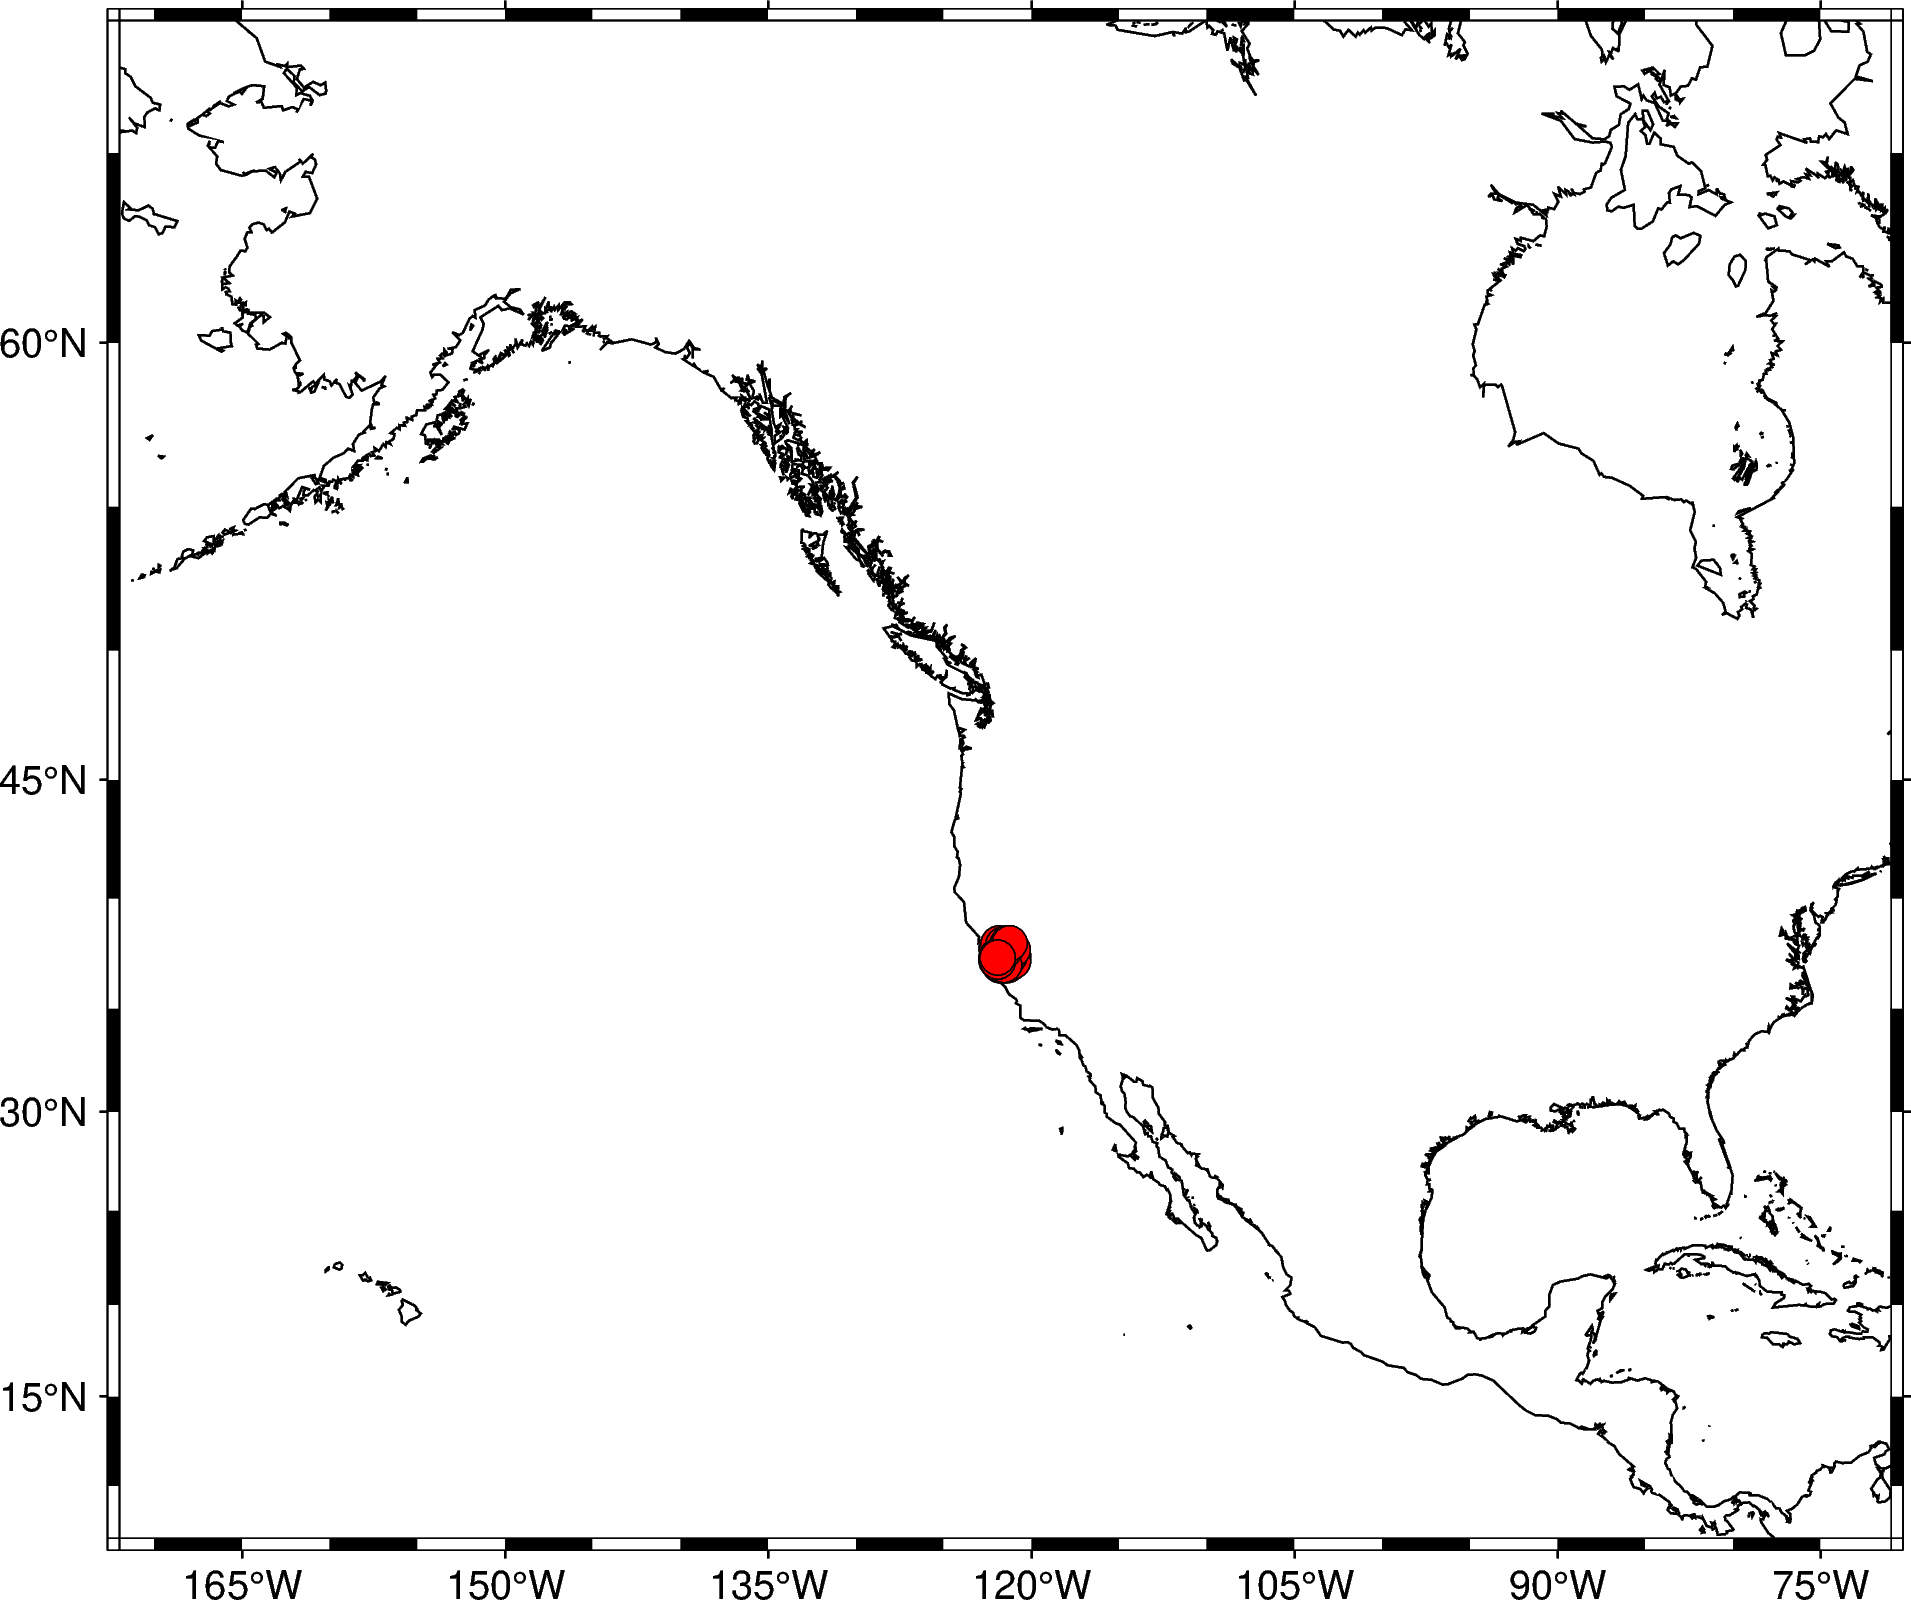

In [8]:
import pygmt
region = [
    lon_min-6,
    lon_max+6,
    lat_min-6,
    lat_max+6,
]

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(shorelines="1/0.5p,black")
fig.plot(x=filtered_data_pd[25], y=filtered_data_pd[24], style="c0.3c", fill="red", pen="black")
fig.show()

region = [
    lon_min-50,
    lon_max+50,
    lat_min-30,
    lat_max+30,
]

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(shorelines="1/0.5p,black")
fig.plot(x=filtered_data_pd[25], y=filtered_data_pd[24], style="c0.3c", fill="red", pen="black")
fig.show()

In [6]:
import os
import pandas as pd

def load_data_to_dataframe(folder_path):
    """
    Reads data from all text files in the specified folder.
    Returns a list of DataFrames, each containing data from one file.
    """
    all_dataframes = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.tenv3'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, delim_whitespace=True, header=0)
            all_dataframes.append(df)

    return all_dataframes

if __name__ == "__main__":
    folder_path = 'DATA'  # Specify the path to your data folder
    dataframes_list = load_data_to_dataframe(folder_path)

   


/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_89400/3472138369.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=0)
/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_89400/3472138369.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=0)
/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_89400/3472138369.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=0)
/var/folders/9f/qj38cd3d5v37nszw4dsn87nr0000gn/T/ipykernel_89400/3472138369.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.r

In [7]:
dataframes_list[2]

,site,YYMMMDD,yyyy.yyyy,__MJD,week,d,reflon,_e0(m),__east(m),____n0(m),...,_ant(m),sig_e(m),sig_n(m),sig_u(m),__corr_en,__corr_eu,__corr_nu,_latitude(deg),_longitude(deg),__height(m)
0,LIVM,10MAY01,2010.3299,55317,1581,6,-121.7,-182,-0.570206,4174528,...,0.0,0.000646,0.000833,0.002644,0.046842,-0.041198,-0.123937,37.702958,-121.702070,159.35151
1,LIVM,10MAY02,2010.3326,55318,1582,0,-121.7,-182,-0.571647,4174528,...,0.0,0.000646,0.000838,0.002633,0.062472,-0.049938,-0.097351,37.702958,-121.702070,159.34872
2,LIVM,10MAY03,2010.3354,55319,1582,1,-121.7,-182,-0.570032,4174528,...,0.0,0.000678,0.000856,0.002777,0.049810,-0.030705,-0.103715,37.702958,-121.702070,159.34505
3,LIVM,10MAY04,2010.3381,55320,1582,2,-121.7,-182,-0.570405,4174528,...,0.0,0.000668,0.000857,0.002755,0.038186,-0.043703,-0.117429,37.702958,-121.702070,159.34892
4,LIVM,10MAY05,2010.3409,55321,1582,3,-121.7,-182,-0.570049,4174528,...,0.0,0.000647,0.000838,0.002643,0.059768,-0.049186,-0.117359,37.702958,-121.702070,159.35180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,LIVM,19AUG23,2019.6413,58718,2067,5,-121.7,-182,-0.795281,4174528,...,0.0,0.000657,0.000824,0.002617,0.009712,-0.016410,-0.128761,37.702958,-121.702073,159.34122
570,LIVM,19AUG24,2019.6441,58719,2067,6,-121.7,-182,-0.800920,4174528,...,0.0,0.000638,0.000803,0.002521,0.001234,0.002710,-0.086463,37.702958,-121.702073,159.33697
571,LIVM,19AUG27,2019.6523,58722,2068,2,-121.7,-182,-0.797965,4174528,...,0.0,0.000642,0.000791,0.002511,0.009705,0.033834,-0.100189,37.702958,-121.702073,159.33546
572,LIVM,19AUG28,2019.6550,58723,2068,3,-121.7,-182,-0.799457,4174528,...,0.0,0.000663,0.000830,0.002623,0.018476,-0.033106,-0.103209,37.702958,-121.702073,159.34397


In [33]:
 # Example: Accessing the first DataFrame in the list
P215_df = dataframes_list[0]
P215 = np.array(P215_df)
#print("First DataFrame shape:", P215_df)
print(P215[0:300,1])

['07APR07' '07APR08' '07APR09' '07APR10' '07APR11' '07APR12' '07APR13'
 '07APR14' '07APR15' '07APR16' '07APR17' '07APR18' '07APR19' '07APR20'
 '07APR21' '07APR22' '07APR23' '07APR24' '07APR25' '07APR26' '07APR27'
 '07APR28' '07APR29' '07APR30' '07MAY01' '07MAY02' '07MAY03' '07MAY04'
 '07MAY05' '07MAY06' '07MAY07' '07MAY08' '07MAY09' '07MAY10' '07MAY11'
 '07MAY12' '07MAY13' '07MAY14' '07MAY15' '07MAY16' '07MAY17' '07MAY18'
 '07MAY19' '07MAY20' '07MAY21' '07MAY22' '07MAY23' '07MAY24' '07MAY25'
 '07MAY26' '07MAY27' '07MAY28' '07MAY29' '07MAY30' '07MAY31' '07JUN01'
 '07JUN02' '07JUN03' '07JUN04' '07JUN05' '07JUN06' '07JUN07' '07JUN08'
 '07JUN09' '07JUN10' '07JUN11' '07JUN12' '07JUN13' '07JUN14' '07JUN15'
 '07JUN16' '07JUN17' '07JUN18' '07JUN19' '07JUN20' '07JUN21' '07JUN22'
 '07JUN23' '07JUN24' '07JUN25' '07JUN26' '07JUN27' '07JUN28' '07JUN29'
 '07JUN30' '07JUL01' '07JUL02' '07JUL03' '07JUL04' '07JUL05' '07JUL06'
 '07JUL07' '07JUL08' '07JUL09' '07JUL10' '07JUL11' '07JUL12' '07JUL13'
 '07JU

In [93]:
def pick_obs_and_time(data):
    array = data  # Convert input data to float64
    time= array[:,2].astype(np.float64) 
    east = array[:,8].astype(np.float64)*1e3 #mm
    north = array[:,10].astype(np.float64)*1e3 #mm
    up = array[:,12].astype(np.float64)*1e3 #mm
    east_sigma= array[:,14].astype(np.float64)*1e3 #mm
    north_sigma= array[:,15].astype(np.float64)*1e3#mm
    up_sigma= array[:,16].astype(np.float64)*1e3 #mm
    Q_yy_east= np.diag(east_sigma*east_sigma)
    Q_yy_north= np.diag(north_sigma*north_sigma)
    Q_yy_up= np.diag(up_sigma*up_sigma)
    
    return time, east, north, up , Q_yy_east, Q_yy_north, Q_yy_up

timeP215, eastP215, northP215, upP215, Q_yy_east, Q_yy_north, Q_yy_up  = pick_obs_and_time(P215)

def invert_Q(Q):
    return np.linalg.inv(Q)

Q_yy_east_inv = invert_Q(Q_yy_east)
Q_yy_north_inv = invert_Q(Q_yy_north)
Q_yy_up_inv = invert_Q(Q_yy_up)


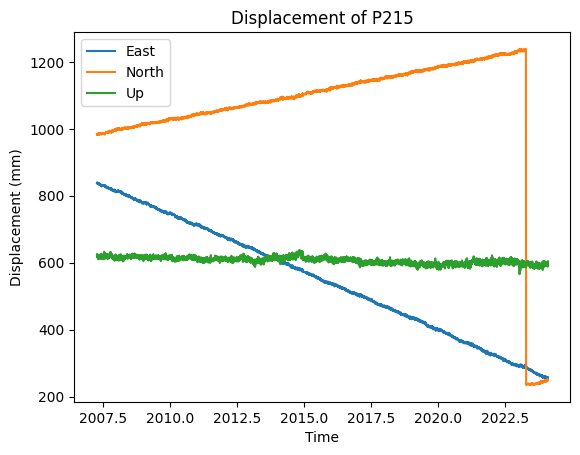

In [11]:
plt.plot(timeP215, eastP215, label='East')
plt.plot(timeP215, northP215, label='North')
plt.plot(timeP215, upP215, label='Up')
plt.xlabel('Time')
plt.ylabel('Displacement (mm)')
plt.title('Displacement of P215')
plt.legend()

In [12]:
def A0_model(data):
    #simple model y= a0 + a1t
    time, east, north, up , east_sigma, north_sigma, up_sigma = pick_obs_and_time(data)
    A0= np.ones((time.size,2))
    A0[:,1]=time
    return A0

A0= A0_model(P215)   


Building blue function
but checking what is the fastest

In [94]:
def B_matrix(A):
          # Compute the null space of A transpose
    null_space_basis = null_space(A.T)
    
    # Construct B from the null space basis
    B = null_space_basis
    return B


In [14]:
def BLUE(A,y,Q_yy):
    """ 
    Function to calculate the Best Linear Unbiased Estimator  
    """
    B= B_matrix(A,y,Q_yy)
    inv = np.linalg.inv(B.T@Q_yy@B)
    y_hat = y- Q_yy@B@inv@(B.T@y)
    
    #x_hat= np.linalg.solve(A, y_hat)
    e_hat = y- y_hat
   

    return y_hat, e_hat


# def BLUE(B,y,Q_yy)

In [18]:

start_time = time.time()

y_hat_e, e_hat_e=BLUE(A0,eastP215,Q_yy_east) #timeP215, eastP215, northP215, upP215, Q_yy_east, Q_yy_north, Q_yy_up 
y_hat_n, e_hat_n=BLUE(A0,northP215,Q_yy_north)
y_hat_u, e_hat_u=BLUE(A0,upP215,Q_yy_up)
  # Stop the timer
end_time = time.time()

    # Calculate the elapsed time
elapsed_time = end_time - start_time

print("Computation took {:.4f} seconds".format(elapsed_time))


float64
Computation took 89.9977 seconds


or just with A matrix

In [95]:
def BLUE2(A,y,inv_Q_yy):
    """ 
    Function to calculate the Best Linear Unbiased Estimator  
    """
    Q_x_hat = np.linalg.inv(A.T @ inv_Q_yy @ A)
    x_hat = np.linalg.solve(A.T @ inv_Q_yy @ A, A.T @ inv_Q_yy @ y)
    y_hat = A @ x_hat
    e_hat = y- y_hat
    return x_hat, Q_x_hat, y_hat, e_hat


# def BLUE(B,y,Q_yy)

Test blue functions on computational speed

In [96]:
# Start the timer
start_time = time.time()
x_hat_e, Q_x_hat_e, y_hat_e, e_hat_e= BLUE2(A0,eastP215,Q_yy_east)
x_hat_n, Q_x_hat_n, y_hat_n, e_hat_n= BLUE2(A0,northP215,Q_yy_north)
x_hat_u, Q_x_hat_u, y_hat_u, e_hat_u= BLUE2(A0,upP215,Q_yy_up)
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Computation took {:.4f} seconds".format(elapsed_time))

Computation took 0.4891 seconds


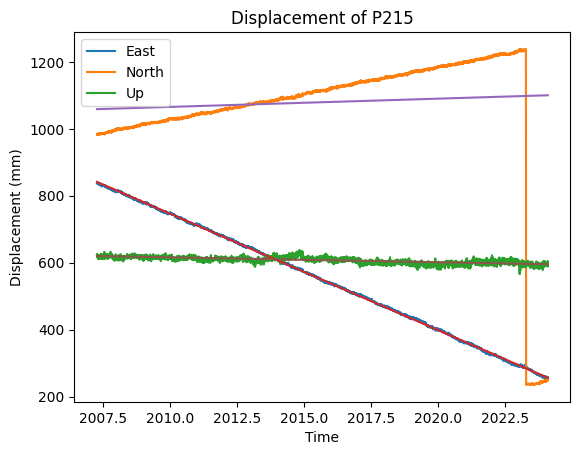

In [97]:
plt.plot(timeP215, eastP215, label='East')
plt.plot(timeP215, northP215, label='North')
plt.plot(timeP215, upP215, label='Up')
plt.plot(timeP215, y_hat_e)
plt.plot(timeP215, y_hat_n)
plt.plot(timeP215, y_hat_u)
plt.xlabel('Time')
plt.ylabel('Displacement (mm)')
plt.title('Displacement of P215')
plt.legend()

Test the model

In [98]:
def overall_model_test(e, inv_Q_yy, A, alpha):
    T_q = e.T @ inv_Q_yy @ e
    m = len(inv_Q_yy[:,0])
    n = A[0,:].size
    q = m - n
    c2 = chi2.ppf(1 - alpha, df=q)


    return T_q, c2

In [99]:
Tq= np.zeros(3)
c2= np.zeros(3)
for i in range(3):
    if i==0:
        Tq[i], c2[i]= overall_model_test(e_hat_e, Q_yy_east_inv, A0, 0.05)
    if i==1:
        Tq[i], c2[i]= overall_model_test(e_hat_n, Q_yy_north_inv, A0, 0.05)
    if i==2:
        Tq[i], c2[i]= overall_model_test(e_hat_u, Q_yy_up_inv, A0, 0.05)



In [100]:
print(f'reject Ho if Tq>c2 {Tq>c2}')
print(f'size {timeP215.size}')

reject Ho if Tq>c2 [ True  True  True]
size 5963


Visualise residuals of the EAST component of 1 station P215

In [21]:
from scipy.stats import norm
PA = A0 @ np.linalg.inv(A0.T @ np.linalg.inv(Q_yy_east) @ A0) @ A0.T @ np.linalg.inv(Q_yy_east)
PA_1 = np.eye(len(eastP215)) - PA
Q_ehat = PA_1 @ Q_yy_east @ PA_1.T




In [ ]:
def Q_ehat_test(e, Q_yy, A, alpha):
    PA = A0 @ np.linalg.inv(A0.T @ np.linalg.inv(Q_yy_east) @ A0) @ A0.T @ np.linalg.inv(Q_yy_east)
    PA_1 = np.eye(len(eastP215)) - PA
    Q_ehat = PA_1 @ Q_yy_east @ PA_1.T

def plot_residuals(time, residuals, title):
    plt.plot(time, residuals, 'o')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.show()

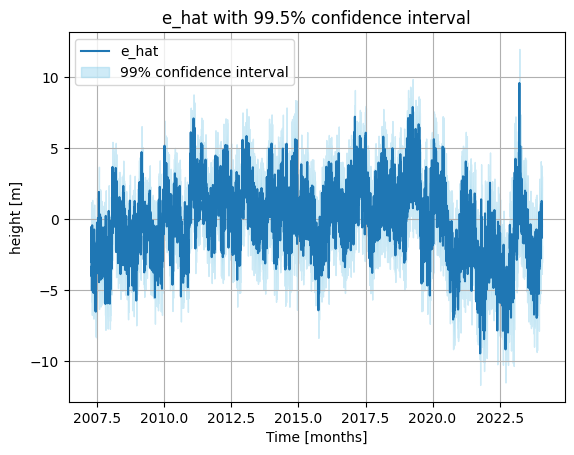

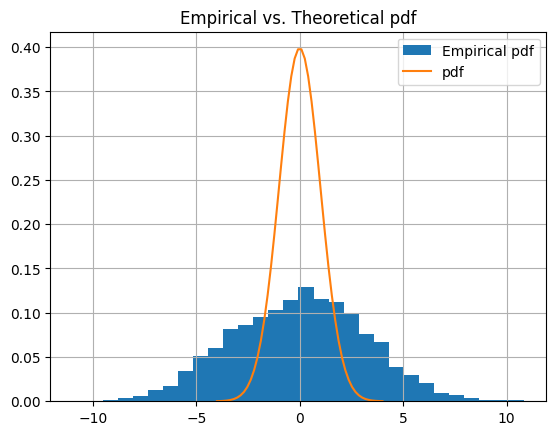

In [43]:
sigma_ehat = np.diag(Q_ehat)**.5
ehat_int = norm.ppf(1-0.005, scale = sigma_ehat )
ehatplus = e_hat_e + ehat_int
ehatmin = e_hat_e - ehat_int
plt.figure()
plt.plot(timeP215, e_hat_e, label='e_hat')

plt.fill_between(timeP215, ehatplus, ehatmin, color='skyblue', alpha=0.4, label='99% confidence interval')
plt.legend()
plt.title(f'e_hat with 99.5% confidence interval')
plt.xlabel('Time [months]')
plt.ylabel('height [m]')
plt.grid()
e_hat_norm = e_hat_e/sigma_ehat

plt.figure()
plt.title(f'Empirical vs. Theoretical pdf')
plt.hist(e_hat_norm, bins=30, density=True, label='Empirical pdf')
plt.plot(np.linspace(-4, 4), norm.pdf(np.linspace(-4, 4)), label='pdf')
plt.grid()
plt.legend()

In [57]:
print(e_hat_e[:20])
print(timeP215.max())

[-2.96311619 -1.24798634 -0.52832542 -2.95566449 -2.70353464 -3.20287372
 -3.19521279 -4.00908294 -3.55642202 -3.28429217 -3.34263124 -4.99297031
 -3.18384047 -2.04117954 -1.44151861 -0.41438876 -3.25372784 -1.97759799
 -2.09893706 -2.98027614]
2024.0821


In [104]:
#interpolate
from scipy.interpolate import interp1d


# Define your regular time grid
regular_time_grid = np.arange(2008, 2024, 1/12)

# Create an interpolation function
interpolated_function = interp1d(timeP215, eastP215, kind='linear', fill_value='extrapolate')

# Interpolate onto the regular time grid
east_interpolated = interpolated_function(regular_time_grid)

0.08333333333325754


Text(0.5, 1.0, 'interpolated east component P215 (even spaced dt={round(dt,3)})')

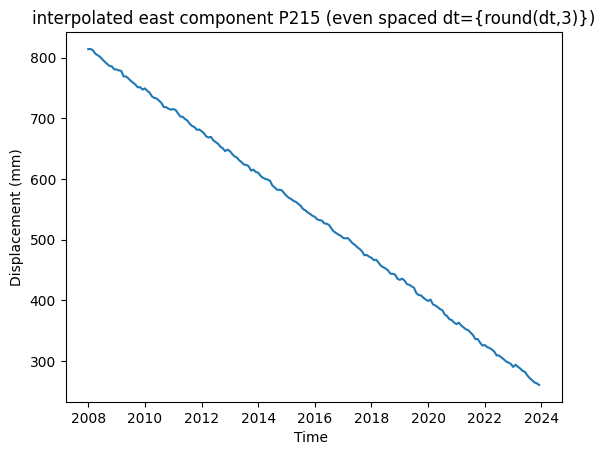

In [105]:
dt= regular_time_grid[1]-regular_time_grid[0]
print(dt)
plt.plot(regular_time_grid, east_interpolated)
plt.xlabel(f'Time ')
plt.ylabel('Displacement (mm)')
plt.title('interpolated east component P215 (even spaced dt={round(dt,3)})')


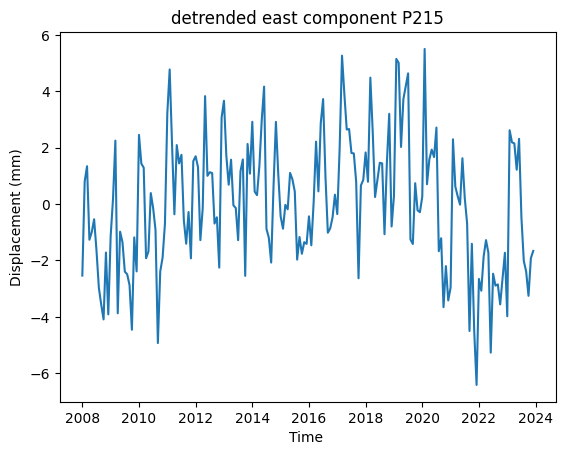

96
96


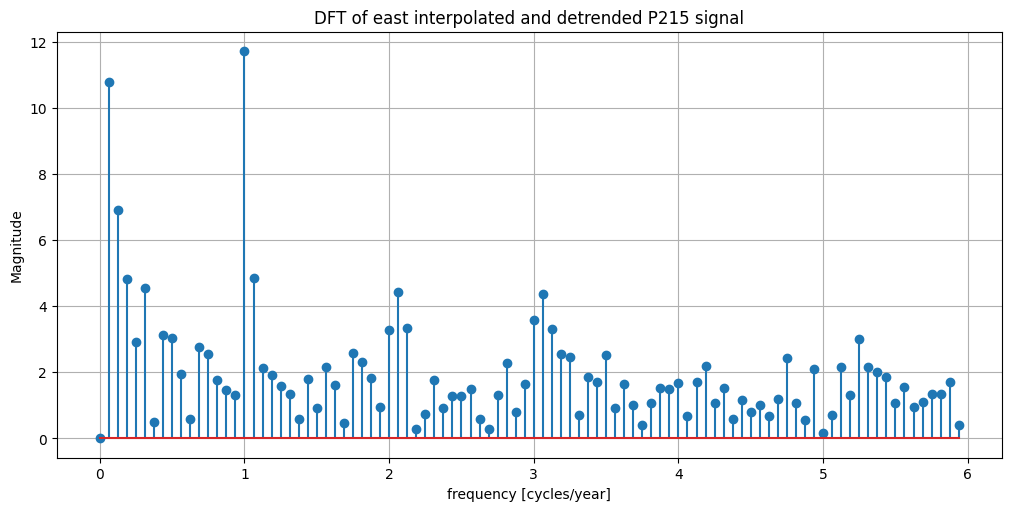

In [106]:
from scipy.fft import fft, ifft, fftshift
slope, intercept = np.polyfit(regular_time_grid, east_interpolated, 1)
trend = slope * regular_time_grid + intercept
P215_detrended= east_interpolated - trend
P215_DFT = dt*fftshift(np.abs(fft(P215_detrended)))

plt.plot(regular_time_grid, P215_detrended)
plt.xlabel(f'Time ')
plt.ylabel('Displacement (mm)')
plt.title('detrended east component P215')
plt.show()

N= P215_detrended.size
k = np.arange(0, N/2) #wave number


freq = k/(N*dt) 
print(freq.size)
half_DFT = P215_DFT[len(P215_DFT)//2:]
print(half_DFT.size)
fig, ax = plt.subplots(1, 1, figsize=(10,5), layout='constrained')
ax.stem(freq,half_DFT)
ax.set_title('DFT of east interpolated and detrended P215 signal')
ax.set_xlabel('frequency [cycles/year]')
ax.set_ylabel('Magnitude')
ax.grid()



In [ ]:
import scip

In [82]:
# create new design model

def A1_model(data):
    #model with trend and yearly seasonality
    time, east, north, up , east_sigma, north_sigma, up_sigma = pick_obs_and_time(data)
    A1= np.ones((time.size,4))
    A1[:,1]=time
    A1[:,2]=np.sin(2*np.pi*time)
    A1[:,3]=np.cos(2*np.pi*time)
    return A1

In [83]:
A1= A1_model(P215)  

In [85]:
# Start the timer
start_time = time.time()
x_hat_e1, Q_x_hat_e1, y_hat_e1, e_hat_e1= BLUE2(A1,eastP215,Q_yy_east)
x_hat_n1, Q_x_hat_n1, y_hat_n1, e_hat_n1= BLUE2(A1,northP215,Q_yy_north)
x_hat_u1, Q_x_hat_u1, y_hat_u1, e_hat_u1= BLUE2(A1,upP215,Q_yy_up)
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Computation took {:.4f} seconds".format(elapsed_time))

Computation took 21.5822 seconds


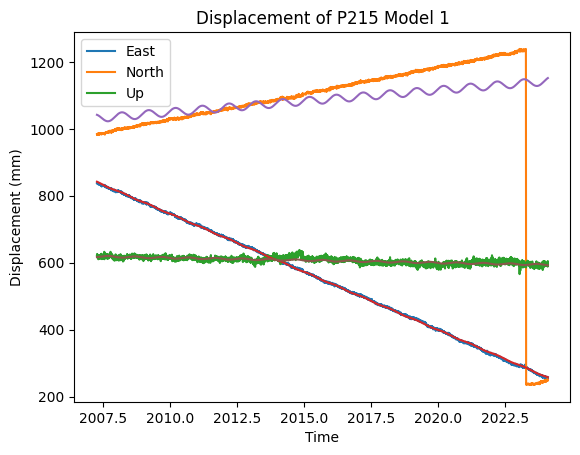

In [86]:
plt.plot(timeP215, eastP215, label='East')
plt.plot(timeP215, northP215, label='North')
plt.plot(timeP215, upP215, label='Up')
plt.plot(timeP215, y_hat_e1)
plt.plot(timeP215, y_hat_n1)
plt.plot(timeP215, y_hat_u1)
plt.xlabel('Time')
plt.ylabel('Displacement (mm)')
plt.title('Displacement of P215 Model 1')
plt.legend()

In [89]:
Tq= np.zeros(3)
c2= np.zeros(3)
for i in range(3):
    if i==0:
        Tq[i], c2[i]= overall_model_test(e_hat_e1, Q_yy_east, A1, 0.1)
    if i==1:
        Tq[i], c2[i]= overall_model_test(e_hat_n1, Q_yy_north, A1, 0.1)
    if i==2:
        Tq[i], c2[i]= overall_model_test(e_hat_u1, Q_yy_up, A1, 0.1)



In [92]:
print(f'reject Ho if Tq>c2 {Tq>c2}')
print(Tq,c2)

reject Ho if Tq>c2 [ True  True  True]
[5.05184610e+04 1.50267132e+08 1.72112127e+04] [6099.32772107 6099.32772107 6099.32772107]


In [3]:
import re

data = [
    'UTide Results:                                                                      ',
    ' Cnstit  Lsmaj  Lsmaj_ci     Lsmin  Lsmin_ci     Theta  Theta_ci         g      g_ci',
    '  M2     0.454   0.00492  -0.00299   0.00528      1.76     0.541      220.     0.643',
    '  S2     0.123   0.00538  3.56e-05   0.00511      3.90      2.40      289.      2.47',
    '  N2    0.0798   0.00540  -0.00257   0.00462      3.52      3.54      199.      3.91',
    '  L2    0.0453   0.00535  -0.00755   0.00511      175.      6.40      50.6      6.06',
    '  K2    0.0432   0.00557 -0.000830   0.00456      174.      6.81      90.3      6.39',
    ' MU2    0.0385   0.00568  -0.00702   0.00484      11.5      6.78      316.      9.43',
    '  M4    0.0306   0.00191   0.00901   0.00155      41.3      3.43      19.9      3.80',
    ' MSM    0.0272    0.0149   -0.0104   0.00768      11.6      33.1      56.2      49.7',
    ' SSA    0.0279    0.0150  -0.00134   0.00833      16.2      21.2      236.      30.8',
    '  O1    0.0265   0.00343   0.00805   0.00235      169.      7.39      349.      7.94',
    '  K1    0.0249   0.00330   0.00836   0.00207      12.6      6.53      359.      19.2',
    '  MM    0.0251    0.0122   0.00163   0.00998      44.6      34.5      242.      29.2',
    'MKS2    0.0170   0.00483   -0.0111   0.00446      28.3      35.8      66.6      36.0',
    'EPS2    0.0183   0.00528  -0.00554   0.00482      11.9      17.8      278.      18.6',
    ' MS4    0.0162   0.00201   0.00963   0.00156      50.6      9.88      103.      11.4',
    ' NU2    0.0171   0.00531  7.29e-05   0.00465      7.33      18.1      171.      21.5',
    '  M6    0.0158   0.00143  -0.00240   0.00114     0.882      5.10      72.5      9.68',
    '2MS6    0.0151   0.00154  -0.00194   0.00111      178.      4.00      313.      8.18',
    '  P1    0.0130   0.00308  -0.00129   0.00227      1.64      15.8      354.      57.0',
    ' MN4    0.0109   0.00203   0.00275   0.00141      47.9      8.18      2.36      16.5',
    '  MF    0.0110   0.00955  -0.00124    0.0118      55.4      82.1      196.      74.9',
    '  Q1    0.0105   0.00304   0.00232   0.00243      171.      14.1      270.      18.6',
    'LDA2   0.00985   0.00467   0.00240   0.00396      30.2      28.7      249.      38.5',
    ' MSF   0.00859   0.00917  -0.00511   0.00849      88.1      147.      85.9      103.',
    ' 2N2   0.00931   0.00489  -0.00314   0.00458      9.86      55.7      212.      72.6',
    ' OQ2   0.00931   0.00410  -0.00304   0.00491      121.      42.3      97.1      37.5',
    ' MK4   0.00616   0.00154   0.00581   0.00167      132.      91.9      171.      89.9',
    '2MN6   0.00824   0.00186  -0.00140   0.00116      175.      9.24      216.      13.4',
    'UPS1   0.00765   0.00337 -0.000520   0.00250      10.1      18.8      78.4      30.3'
]

# Regular expression pattern to extract numbers (including floats in scientific notation)
pattern = r'[-+]?\d*\.\d+|\d+'

# Extracting numbers from each line of data
numbers = [[float(num) if '.' in num else int(num) for num in re.findall(pattern, line)] for line in data]

# Displaying the extracted numbers
for row in numbers:
    print(row)
print(len(numbers))


[]
[]
[2, 0.454, 0.00492, -0.00299, 0.00528, 1.76, 0.541, 220, 0.643]
[2, 0.123, 0.00538, 3.56, 5, 0.00511, 3.9, 2.4, 289, 2.47]
[2, 0.0798, 0.0054, -0.00257, 0.00462, 3.52, 3.54, 199, 3.91]
[2, 0.0453, 0.00535, -0.00755, 0.00511, 175, 6.4, 50.6, 6.06]
[2, 0.0432, 0.00557, -0.00083, 0.00456, 174, 6.81, 90.3, 6.39]
[2, 0.0385, 0.00568, -0.00702, 0.00484, 11.5, 6.78, 316, 9.43]
[4, 0.0306, 0.00191, 0.00901, 0.00155, 41.3, 3.43, 19.9, 3.8]
[0.0272, 0.0149, -0.0104, 0.00768, 11.6, 33.1, 56.2, 49.7]
[0.0279, 0.015, -0.00134, 0.00833, 16.2, 21.2, 236, 30.8]
[1, 0.0265, 0.00343, 0.00805, 0.00235, 169, 7.39, 349, 7.94]
[1, 0.0249, 0.0033, 0.00836, 0.00207, 12.6, 6.53, 359, 19.2]
[0.0251, 0.0122, 0.00163, 0.00998, 44.6, 34.5, 242, 29.2]
[2, 0.017, 0.00483, -0.0111, 0.00446, 28.3, 35.8, 66.6, 36.0]
[2, 0.0183, 0.00528, -0.00554, 0.00482, 11.9, 17.8, 278, 18.6]
[4, 0.0162, 0.00201, 0.00963, 0.00156, 50.6, 9.88, 103, 11.4]
[2, 0.0171, 0.00531, 7.29, 5, 0.00465, 7.33, 18.1, 171, 21.5]
[6, 0.0158, 0

In [5]:
import re
import numpy as np

data = [
    'UTide Results:                                                                      ',
    ' Cnstit  Lsmaj  Lsmaj_ci     Lsmin  Lsmin_ci     Theta  Theta_ci         g      g_ci',
    '  M2     0.454   0.00492  -0.00299   0.00528      1.76     0.541      220.     0.643',
    '  S2     0.123   0.00538  3.56e-05   0.00511      3.90      2.40      289.      2.47',
    '  N2    0.0798   0.00540  -0.00257   0.00462      3.52      3.54      199.      3.91',
    '  L2    0.0453   0.00535  -0.00755   0.00511      175.      6.40      50.6      6.06',
    '  K2    0.0432   0.00557 -0.000830   0.00456      174.      6.81      90.3      6.39',
    ' MU2    0.0385   0.00568  -0.00702   0.00484      11.5      6.78      316.      9.43',
    '  M4    0.0306   0.00191   0.00901   0.00155      41.3      3.43      19.9      3.80',
    ' MSM    0.0272    0.0149   -0.0104   0.00768      11.6      33.1      56.2      49.7',
    ' SSA    0.0279    0.0150  -0.00134   0.00833      16.2      21.2      236.      30.8',
    '  O1    0.0265   0.00343   0.00805   0.00235      169.      7.39      349.      7.94',
    '  K1    0.0249   0.00330   0.00836   0.00207      12.6      6.53      359.      19.2',
    '  MM    0.0251    0.0122   0.00163   0.00998      44.6      34.5      242.      29.2',
    'MKS2    0.0170   0.00483   -0.0111   0.00446      28.3      35.8      66.6      36.0',
    'EPS2    0.0183   0.00528  -0.00554   0.00482      11.9      17.8      278.      18.6',
    ' MS4    0.0162   0.00201   0.00963   0.00156      50.6      9.88      103.      11.4',
    ' NU2    0.0171   0.00531  7.29e-05   0.00465      7.33      18.1      171.      21.5',
    '  M6    0.0158   0.00143  -0.00240   0.00114     0.882      5.10      72.5      9.68',
    '2MS6    0.0151   0.00154  -0.00194   0.00111      178.      4.00      313.      8.18',
    '  P1    0.0130   0.00308  -0.00129   0.00227      1.64      15.8      354.      57.0',
    ' MN4    0.0109   0.00203   0.00275   0.00141      47.9      8.18      2.36      16.5',
    '  MF    0.0110   0.00955  -0.00124    0.0118      55.4      82.1      196.      74.9',
    '  Q1    0.0105   0.00304   0.00232   0.00243      171.      14.1      270.      18.6',
    'LDA2   0.00985   0.00467   0.00240   0.00396      30.2      28.7      249.      38.5',
    ' MSF   0.00859   0.00917  -0.00511   0.00849      88.1      147.      85.9      103.',
    ' 2N2   0.00931   0.00489  -0.00314   0.00458      9.86      55.7      212.      72.6',
    ' OQ2   0.00931   0.00410  -0.00304   0.00491      121.      42.3      97.1      37.5',
    ' MK4   0.00616   0.00154   0.00581   0.00167      132.      91.9      171.      89.9',
    '2MN6   0.00824   0.00186  -0.00140   0.00116      175.      9.24      216.      13.4',
    'UPS1   0.00765   0.00337 -0.000520   0.00250      10.1      18.8      78.4      30.3'
]

# Regular expression pattern to extract numbers (including floats in scientific notation)
pattern = r'[-+]?\d*\.\d+|\d+'

# Extracting numbers from each line of data
numbers = [[float(num) if '.' in num else int(num) for num in re.findall(pattern, line)] for line in data]

# # Convert the list of lists into a NumPy array
# numbers_array = np.array(numbers)

print(numbers)


[[], [], [2, 0.454, 0.00492, -0.00299, 0.00528, 1.76, 0.541, 220, 0.643], [2, 0.123, 0.00538, 3.56, 5, 0.00511, 3.9, 2.4, 289, 2.47], [2, 0.0798, 0.0054, -0.00257, 0.00462, 3.52, 3.54, 199, 3.91], [2, 0.0453, 0.00535, -0.00755, 0.00511, 175, 6.4, 50.6, 6.06], [2, 0.0432, 0.00557, -0.00083, 0.00456, 174, 6.81, 90.3, 6.39], [2, 0.0385, 0.00568, -0.00702, 0.00484, 11.5, 6.78, 316, 9.43], [4, 0.0306, 0.00191, 0.00901, 0.00155, 41.3, 3.43, 19.9, 3.8], [0.0272, 0.0149, -0.0104, 0.00768, 11.6, 33.1, 56.2, 49.7], [0.0279, 0.015, -0.00134, 0.00833, 16.2, 21.2, 236, 30.8], [1, 0.0265, 0.00343, 0.00805, 0.00235, 169, 7.39, 349, 7.94], [1, 0.0249, 0.0033, 0.00836, 0.00207, 12.6, 6.53, 359, 19.2], [0.0251, 0.0122, 0.00163, 0.00998, 44.6, 34.5, 242, 29.2], [2, 0.017, 0.00483, -0.0111, 0.00446, 28.3, 35.8, 66.6, 36.0], [2, 0.0183, 0.00528, -0.00554, 0.00482, 11.9, 17.8, 278, 18.6], [4, 0.0162, 0.00201, 0.00963, 0.00156, 50.6, 9.88, 103, 11.4], [2, 0.0171, 0.00531, 7.29, 5, 0.00465, 7.33, 18.1, 171, 2